## Looking at HW 5
Problem 3 is about multiplying polynomials using FFTs

In [1]:
import time
import numpy as np

# Lets say we have two polynomicals: C and B of degrees n and m with coefficients c and b.
c = [5, 9, 3]
b = [4, 8, 6, 11, 25]


# Lets write out each of the polynomial terms
def polyToString(coeffs):
    return "".join([str(coeffs[i]) + (("x^" + str(i)) if i > 1 else "x" if i > 0 else "")  + (" + " if i < len(coeffs)-1 else "")for i in range(len(coeffs))])
# Print the polynomials
print("C(x) = " + polyToString(c))
print("B(x) = " + polyToString(b))

C(x) = 5 + 9x + 3x^2
B(x) = 4 + 8x + 6x^2 + 11x^3 + 25x^4


In [2]:
def multiplyPolynomialsNaive(c, b):
    # Lets return a list of coefficients and the complexity of the algorithm: Aka how many operations we did
    # We will use the naive method of multiplying polynomials
    y = [0] * (len(c) + len(b) - 1)
    operations = 0
    for i in range(len(c)):
        for j in range(len(b)):
            y[i+j] += c[i] * b[j]
            operations += 1
    return y, operations

# Lets multiply them together
y, operations = multiplyPolynomialsNaive(c, b)
print("C(x) * B(x) = " + polyToString(y))
print("Operations: " + str(operations))

C(x) * B(x) = 20 + 76x + 114x^2 + 133x^3 + 242x^4 + 258x^5 + 75x^6
Operations: 15


In [3]:
# Lets define FFT and IFFT
def FFT(f, N):
    # We will use a recursive implementation of the FFT and return the coefficients and the number of operations
    operations = 0
    if N == 1:
        return f, operations
    else:
        # We do not know if the length of f is a power of 2, so we will pad it with zeros
        # We will pad it with zeros until it is a power of 2
        while N & (N - 1) != 0:
            f.append(0)
            N += 1
        # We will split the coefficients into even and odd
        Y_even, operations_even = FFT(f[::2], N//2)
        Y_odd, operations_odd = FFT(f[1::2], N//2)
        operations = operations_even + operations_odd
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        Y = np.concatenate([Y_even + factor[:N//2] * Y_odd, Y_even + factor[N//2:] * Y_odd])
        operations += N
        return Y, operations
    
def IFFT(f, N):
    # We will use a recursive implementation of the IFFT and return the coefficients and the number of operations
    operations = 0
    if N == 1:
        return f, operations
    else:
        # We do not know if the length of f is a power of 2, so we will pad it with zeros
        # We will pad it with zeros until it is a power of 2
        while N & (N - 1) != 0:
            f.append(0)
            N += 1
        # We will split the coefficients into even and odd
        Y_even, operations_even = IFFT(f[::2], N//2)
        Y_odd, operations_odd = IFFT(f[1::2], N//2)
        operations = operations_even + operations_odd
        factor = np.exp(2j * np.pi * np.arange(N) / N)
        Y = np.concatenate([Y_even + factor[:N//2] * Y_odd, Y_even + factor[N//2:] * Y_odd])
        operations += N
        return Y, operations


def multiplyPolynomialsFFT(c, b):
    # Lets return a list of coefficients and the complexity of the algorithm: Aka how many operations we did
    # We will use the FFT method of multiplying polynomials
    # First we need to pad the polynomials with zeros
    if len(c) > len(b):
        b = b + [0] * (len(c) - len(b))
    else:
        c = c + [0] * (len(b) - len(c))
    operations = 0
    # We will use the FFT to multiply the polynomials
    # First we will take the FFT of the polynomials
    C, operations_C = FFT(c, len(c))
    B, operations_B = FFT(b, len(b))
    operations = operations_C + operations_B
    # We will multiply the coefficients together
    Y = C * B
    operations += len(Y)
    # We will take the IFFT of the coefficients
    y, operations_IFFT = IFFT(Y, len(Y))
    operations += operations_IFFT
    # We will divide by N
    y = y / len(y)
    operations += len(y)
    # We will return the coefficients
    # For some reason the IFFT returns a complex number, so we will take the real part and round it
    y = np.round(np.real(y))
    # If the last coefficient is 0, we will remove it
    if y[-1] == 0:
        y = y[:-1]
    return y, operations


# Lets multiply them together
y, operations = multiplyPolynomialsFFT(c, b)
print("C(x) * B(x) = " + polyToString(y))
print("Operations: " + str(operations))

C(x) * B(x) = 20.0 + 76.0x + 114.0x^2 + 133.0x^3 + 242.0x^4 + 258.0x^5 + 75.0x^6
Operations: 88


In [4]:
# Now that we have both algorithms, lets stress test them
# Lets create two polynomial of random coefficients of size 200 and 300
c = list(np.random.randint(0, 100, 200))
b = list(np.random.randint(0, 100, 300))
# Lets multiply them together
y, operations = multiplyPolynomialsNaive(c, b)
print("C(x) * B(x) = " + polyToString(y))
print("Operations: " + str(operations))
y, operations = multiplyPolynomialsFFT(c, b)
print("C(x) * B(x) = " + polyToString(y))
print("Operations: " + str(operations))

C(x) * B(x) = 240 + 2147x + 6010x^2 + 8784x^3 + 13972x^4 + 16641x^5 + 21471x^6 + 20483x^7 + 21289x^8 + 23533x^9 + 22013x^10 + 22659x^11 + 27336x^12 + 26538x^13 + 30053x^14 + 30121x^15 + 32377x^16 + 34371x^17 + 35759x^18 + 47050x^19 + 42035x^20 + 48737x^21 + 45216x^22 + 48807x^23 + 48408x^24 + 54292x^25 + 53918x^26 + 64031x^27 + 61750x^28 + 63709x^29 + 60909x^30 + 60353x^31 + 61188x^32 + 66060x^33 + 70662x^34 + 72597x^35 + 79657x^36 + 70634x^37 + 66979x^38 + 66073x^39 + 80636x^40 + 83668x^41 + 85448x^42 + 91123x^43 + 97911x^44 + 87771x^45 + 84669x^46 + 93254x^47 + 106652x^48 + 106911x^49 + 106272x^50 + 118474x^51 + 104987x^52 + 100217x^53 + 105716x^54 + 113295x^55 + 121493x^56 + 126762x^57 + 141202x^58 + 118599x^59 + 126645x^60 + 127788x^61 + 130362x^62 + 131560x^63 + 130392x^64 + 146483x^65 + 144513x^66 + 133046x^67 + 139562x^68 + 147286x^69 + 161655x^70 + 148157x^71 + 166507x^72 + 171713x^73 + 161346x^74 + 152591x^75 + 161791x^76 + 164605x^77 + 164495x^78 + 175215x^79 + 170820x^80 + 1

Outer: 100%|██████████| 200/200 [1:38:44<00:00, 29.62s/it]  


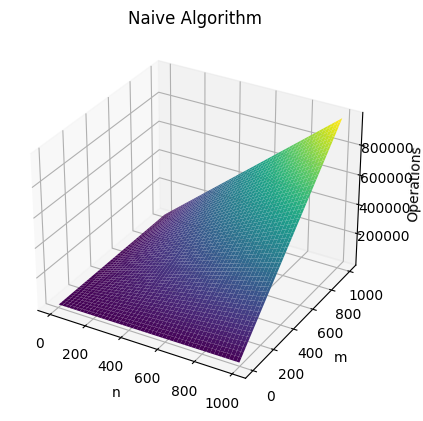

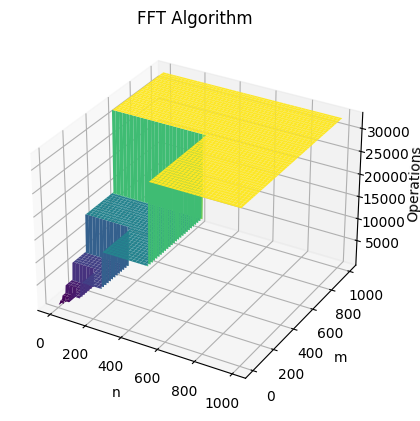

: 

In [5]:
# Now lets go a bit crazy and do this for polynomials of sizes n from 1 to 1000 with polynomials of size m from 1 to 1000 and plot the results on a 3D graph to see the difference in complexity for each algorithm
import matplotlib.pyplot as plt
import tqdm

# Lets create a list of the sizes of the polynomials
n = list(range(2, 1001, 5))
m = list(range(2, 1001, 5))
# Lets create a list of the number of operations for each algorithm
operations_naive = []
operations_fft = []
# Lets loop through the sizes of the polynomials
for i in tqdm.tqdm(n, desc="Outer", position=0):
    operations_naive_this_n = []
    operations_fft_this_n = []
    for j in tqdm.tqdm(m, desc="Inner", position=1, leave=False):
        # Lets create two polynomials of size i and j
        c = list(np.random.randint(0, 100, i))
        b = list(np.random.randint(0, 100, j))
        # Lets multiply them together
        y, operations = multiplyPolynomialsNaive(c, b)
        operations_naive_this_n.append(operations)
        y, operations = multiplyPolynomialsFFT(c, b)
        operations_fft_this_n.append(operations)
    operations_naive.append(operations_naive_this_n)
    operations_fft.append(operations_fft_this_n)

# Convert the lists to numpy arrays
operations_naive = np.array(operations_naive)
operations_fft = np.array(operations_fft)
# Lets plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(n, m)
ax.plot_surface(X, Y, operations_naive, cmap='viridis', edgecolor='none')
ax.set_title('Naive Algorithm')
ax.set_xlabel('n')
ax.set_ylabel('m')
ax.set_zlabel('Operations')
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(n, m)
ax.plot_surface(X, Y, operations_fft, cmap='viridis', edgecolor='none')
ax.set_title('FFT Algorithm')
ax.set_xlabel('n')
ax.set_ylabel('m')
ax.set_zlabel('Operations')
plt.show()
